In [15]:
!pip install --upgrade plotly kaleido

Defaulting to user installation because normal site-packages is not writeable


In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set some display options for better viewing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 1000)

# Load your dataset into a pandas DataFrame
df = pd.read_csv('Exports to Asian Countries_Sample_Data.csv')

# Display the first 5 rows to confirm it loaded correctly
print("First 5 rows of the dataset:")
print(df.head())

# Display the last 5 rows
print("\nLast 5 rows of the dataset:")
print(df.tail())

First 5 rows of the dataset:
  Date (date) Country Name (country_name) ISO Alpha 3 Code (alpha_3_code)  Country Code (country_code) Region Name (region)  Region Code (region_code) Sub-Region Name (sub_region)  Sub-Region Code (sub_region_code)  Harmonized System Code (hs_code)          Commodity Name (commodity) Unit of Quantity (unit)  Quantity of commodity (value_qt)  Value of commodity quantity in INR (value_rs)  Value of commodity quantity in US Dollars (value_dl)
0  2024-04-01        United Arab Emirates                             ARE                          784                 Asia                        142                 Western Asia                                145                          84194090                              Others                     Nos                              1.00                                           0.12                                               0.01   
1  2019-08-01                    Thailand                             THA          

In [2]:
# Get a concise summary of the dataframe
print("\nDataset Information (df.info()):")
df.info()

# Get a statistical summary of the numerical columns
print("\nStatistical Summary (df.describe()):")
print(df.describe())

# Check for missing values (column-wise)
print("\nMissing Values (column-wise):")
print(df.isnull().sum())

# Check unique values of important categorical columns
print("\nUnique Countries:", df['Country Name (country_name)'].nunique())
print("Unique Commodities:", df['Commodity Name (commodity)'].nunique())
print("Unique Units of Quantity:", df['Unit of Quantity (unit)'].unique())


Dataset Information (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Date (date)                                           500 non-null    object 
 1   Country Name (country_name)                           500 non-null    object 
 2   ISO Alpha 3 Code (alpha_3_code)                       500 non-null    object 
 3   Country Code (country_code)                           500 non-null    int64  
 4   Region Name (region)                                  500 non-null    object 
 5   Region Code (region_code)                             500 non-null    int64  
 6   Sub-Region Name (sub_region)                          500 non-null    object 
 7   Sub-Region Code (sub_region_code)                     500 non-null    int64  
 8   Harmonized System Code (hs

In [3]:
print("\n" + "="*60)
print("          PART 1: FULL DESCRIPTIVE STATISTICS")
print("="*60 + "\n")

# Standard Descriptive Statistics
print("📊 Standard Descriptive Statistics (via .describe()):")
numerical_df = df.select_dtypes(include=np.number)
print(numerical_df.describe().round(2))

# Additional Statistics (Mode, Variance, Skew, Kurtosis)
print("\n📈 Additional Statistics:")
additional_stats = {
    'Mode': {},
    'Variance': {},
    'Skewness': {},
    'Kurtosis': {}
}

for col in numerical_df.columns:
    additional_stats['Mode'][col] = numerical_df[col].mode().iloc[0]
    additional_stats['Variance'][col] = numerical_df[col].var()
    additional_stats['Skewness'][col] = numerical_df[col].skew()
    additional_stats['Kurtosis'][col] = numerical_df[col].kurt()

additional_stats_df = pd.DataFrame(additional_stats)
print(additional_stats_df.round(2))


          PART 1: FULL DESCRIPTIVE STATISTICS

📊 Standard Descriptive Statistics (via .describe()):
       Country Code (country_code)  Region Code (region_code)  Sub-Region Code (sub_region_code)  Harmonized System Code (hs_code)  Quantity of commodity (value_qt)  Value of commodity quantity in INR (value_rs)  Value of commodity quantity in US Dollars (value_dl)
count                       500.00                     500.00                             500.00                            500.00                            496.00                                         500.00                                             472.00   
mean                        457.61                     142.00                              73.04                       53291760.36                           3058.32                                          49.29                                               0.08   
std                         240.99                       0.00                              53.29     

In [4]:
print("\n" + "="*60)
print("        ✅ DATA QUALITY DIAGNOSTIC REPORT")
print("="*60 + "\n")

# Basic Info
print("🔍 BASIC INFO")
print(df.info())
print("\n📏 Dataset Shape:", df.shape)

# Missing & Value Checks
print("\n--- 1. Missing & Value Checks ---")
print("\n📌 Missing Values (% of total):")
missing = df.isnull().mean().round(3) * 100
print(missing[missing > 0].sort_values(ascending=False))

# Zero-value checks
print("\n❗ Zero Values in Key Columns:")
for col in ['Quantity of commodity (value_qt)', 'Value of commodity quantity in INR (value_rs)', 'Value of commodity quantity in US Dollars (value_dl)']:
    if col in df.columns:
        print(f"{col}: {(df[col] == 0).sum()} rows")

# Duplicates
print("\n--- 2. Duplicates & Summary ---")
print("🧬 Duplicate Rows:", df.duplicated().sum())

# Summary for Key Columns
print("\n📊 Summary Statistics for Key Columns:")
print(df[['Quantity of commodity (value_qt)', 'Value of commodity quantity in INR (value_rs)', 'Value of commodity quantity in US Dollars (value_dl)']].describe())


        ✅ DATA QUALITY DIAGNOSTIC REPORT

🔍 BASIC INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Date (date)                                           500 non-null    object 
 1   Country Name (country_name)                           500 non-null    object 
 2   ISO Alpha 3 Code (alpha_3_code)                       500 non-null    object 
 3   Country Code (country_code)                           500 non-null    int64  
 4   Region Name (region)                                  500 non-null    object 
 5   Region Code (region_code)                             500 non-null    int64  
 6   Sub-Region Name (sub_region)                          500 non-null    object 
 7   Sub-Region Code (sub_region_code)                     500 non-null    int64  
 8   Harm

In [5]:
print("\n--- Capturing 'Before Cleaning' Snapshot ---")
df_cleaned = df.copy()
print(f"Created a new DataFrame 'df_cleaned' with {len(df_cleaned)} rows to begin cleaning.")

# Step 1: Convert Date Column
df_cleaned['date'] = pd.to_datetime(df_cleaned['Date (date)'])

# Step 2: Handle Missing Values
df_cleaned['Value of commodity quantity in US Dollars (value_dl)'].fillna(0, inplace=True)

# Step 3: Rename Columns
df_cleaned.rename(columns={
    'Country Name (country_name)': 'country_name',
    'Commodity Name (commodity)': 'commodity',
    'Quantity of commodity (value_qt)': 'quantity',
    'Value of commodity quantity in INR (value_rs)': 'value_inr',
    'Value of commodity quantity in US Dollars (value_dl)': 'value_usd',
    'Unit of Quantity (unit)': 'unit'
}, inplace=True)


# Step 4: Type Casting
df_cleaned['quantity'] = df_cleaned['quantity'].astype(float)
df_cleaned['value_inr'] = df_cleaned['value_inr'].astype(float)
df_cleaned['value_usd'] = df_cleaned['value_usd'].astype(float)


print("--- Cleaning Process Complete. The `df_cleaned` DataFrame is ready for analysis. ---")
print("\nCleaned DataFrame head:")
print(df_cleaned.head())


--- Capturing 'Before Cleaning' Snapshot ---
Created a new DataFrame 'df_cleaned' with 500 rows to begin cleaning.
--- Cleaning Process Complete. The `df_cleaned` DataFrame is ready for analysis. ---

Cleaned DataFrame head:
  Date (date)          country_name ISO Alpha 3 Code (alpha_3_code)  Country Code (country_code) Region Name (region)  Region Code (region_code) Sub-Region Name (sub_region)  Sub-Region Code (sub_region_code)  Harmonized System Code (hs_code)                           commodity unit  quantity  value_inr  value_usd       date
0  2024-04-01  United Arab Emirates                             ARE                          784                 Asia                        142                 Western Asia                                145                          84194090                              Others  Nos      1.00       0.12       0.01 2024-04-01
1  2019-08-01              Thailand                             THA                          764                 Asia   

C:\Users\adity\AppData\Local\Temp\ipykernel_10236\3748496355.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Value of commodity quantity in US Dollars (value_dl)'].fillna(0, inplace=True)


C:\Users\adity\AppData\Local\Temp\ipykernel_10236\3691544708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_commodities.index, y=top_10_commodities.values, palette='plasma')


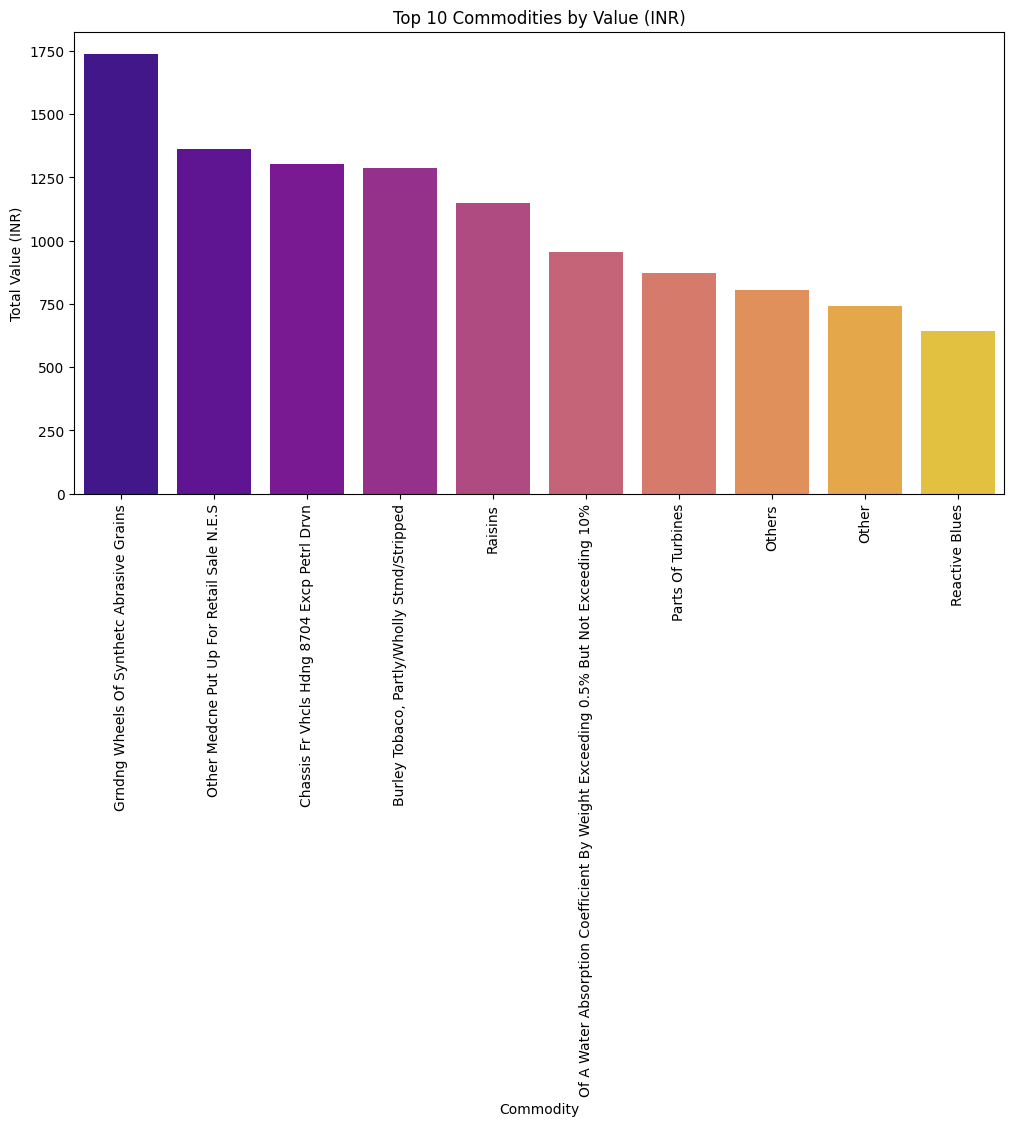

In [ ]:
plt.figure(figsize=(12, 6))
top_10_countries = df_cleaned.groupby('country_name')['value_inr'].sum().nlargest(10)
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')
plt.title('Top 10 Export Countries by Value (INR)')
plt.xlabel('Country')
plt.ylabel('Total Value (INR)')
plt.xticks(rotation=45)
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_10236\3691544708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_commodities.index, y=top_10_commodities.values, palette='plasma')


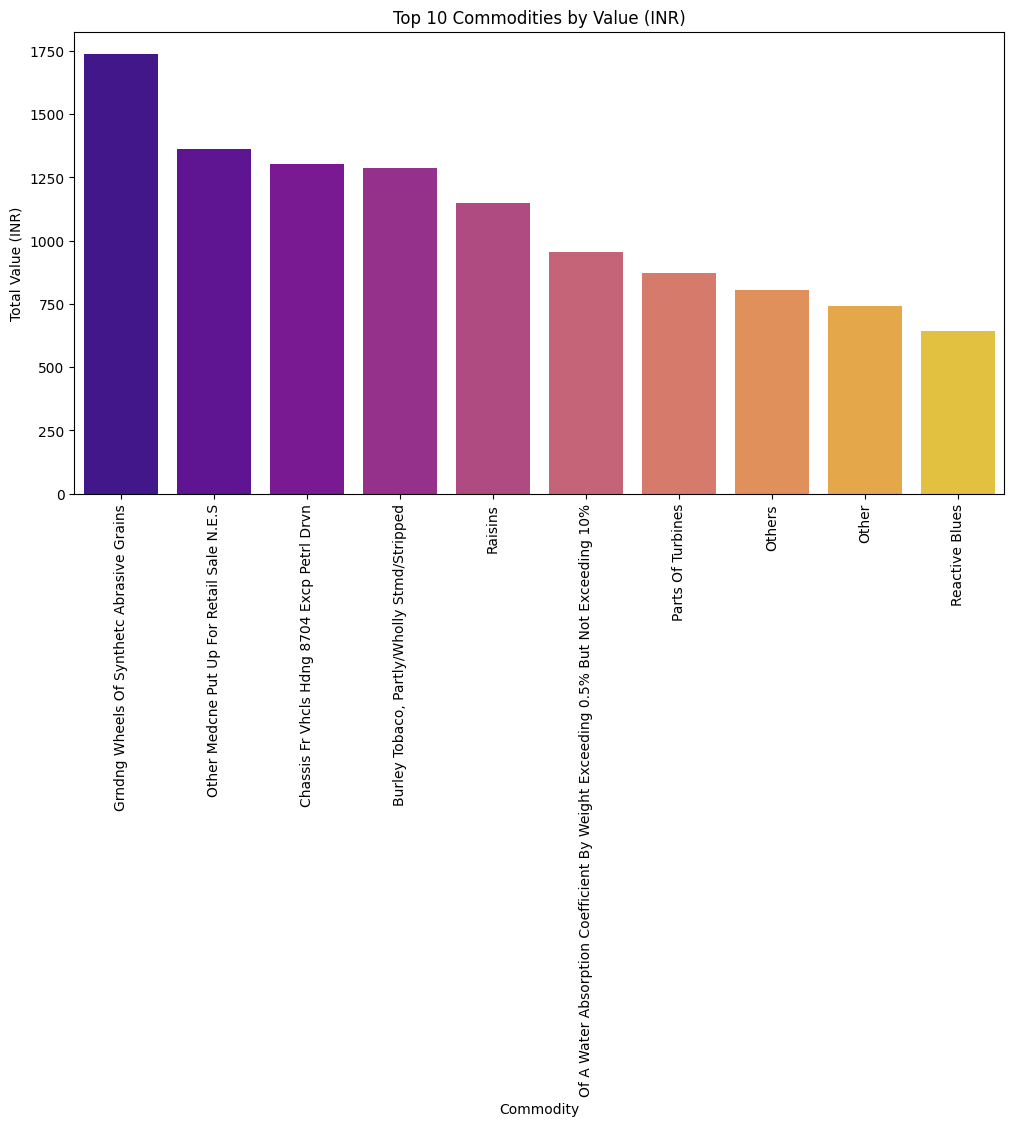

In [8]:
plt.figure(figsize=(12, 6))
top_10_commodities = df_cleaned.groupby('commodity')['value_inr'].sum().nlargest(10)
sns.barplot(x=top_10_commodities.index, y=top_10_commodities.values, palette='plasma')
plt.title('Top 10 Commodities by Value (INR)')
plt.xlabel('Commodity')
plt.ylabel('Total Value (INR)')
plt.xticks(rotation=90)
plt.show()

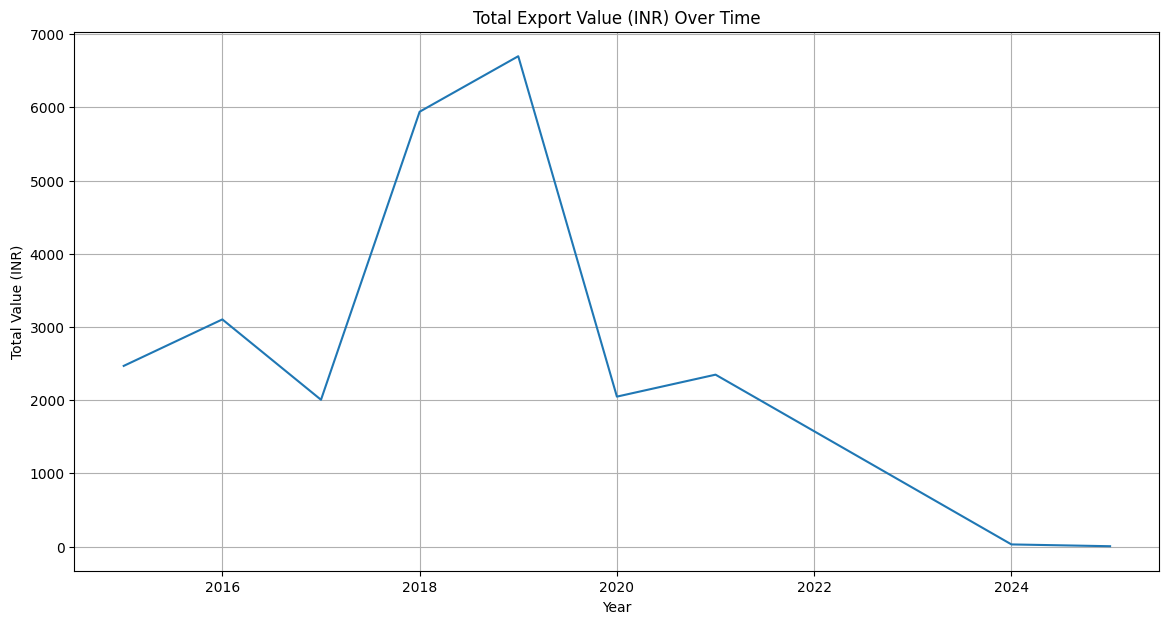

In [9]:
plt.figure(figsize=(14, 7))
df_cleaned.groupby(df_cleaned['date'].dt.year)['value_inr'].sum().plot(kind='line')
plt.title('Total Export Value (INR) Over Time')
plt.xlabel('Year')
plt.ylabel('Total Value (INR)')
plt.grid(True)
plt.show()

In [10]:
# --- Feature Engineering ---
print("🚀 Performing Feature Engineering...")

# Extract date components
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['day'] = df_cleaned['date'].dt.day

# Calculate value per quantity (unit price)
# Adding a small epsilon (1e-6) to avoid division by zero
df_cleaned['value_per_quantity'] = df_cleaned['value_inr'] / (df_cleaned['quantity'] + 1e-6)

print("✅ New Features Added: 'year', 'month', 'day', 'value_per_quantity'")
print("\nDataFrame with new features (first 5 rows):")
print(df_cleaned.head())

🚀 Performing Feature Engineering...
✅ New Features Added: 'year', 'month', 'day', 'value_per_quantity'

DataFrame with new features (first 5 rows):
  Date (date)          country_name ISO Alpha 3 Code (alpha_3_code)  Country Code (country_code) Region Name (region)  Region Code (region_code) Sub-Region Name (sub_region)  Sub-Region Code (sub_region_code)  Harmonized System Code (hs_code)                           commodity unit  quantity  value_inr  value_usd       date  year  month  day  value_per_quantity
0  2024-04-01  United Arab Emirates                             ARE                          784                 Asia                        142                 Western Asia                                145                          84194090                              Others  Nos      1.00       0.12       0.01 2024-04-01  2024      4    1                0.12
1  2019-08-01              Thailand                             THA                          764                 Asia     


--- Performing Univariate Analysis ---


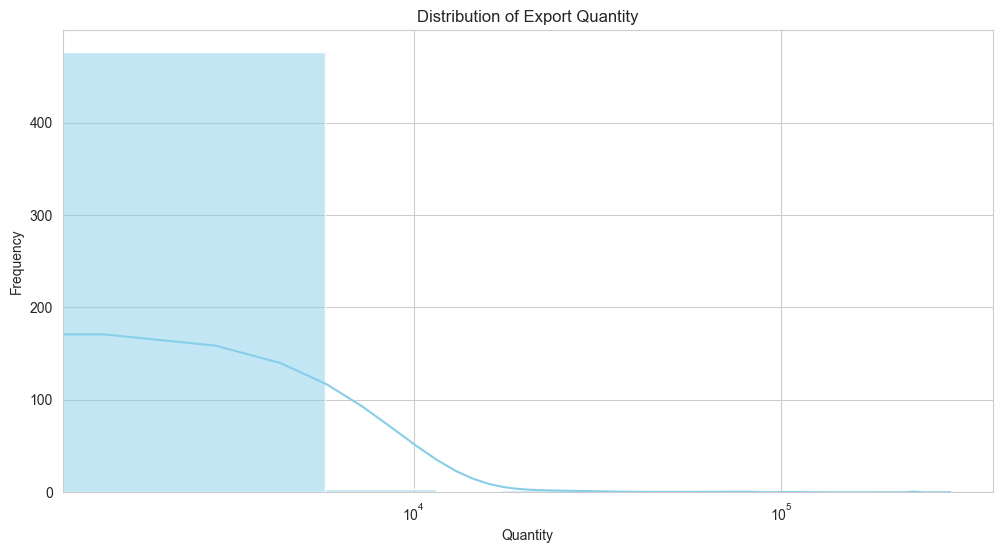

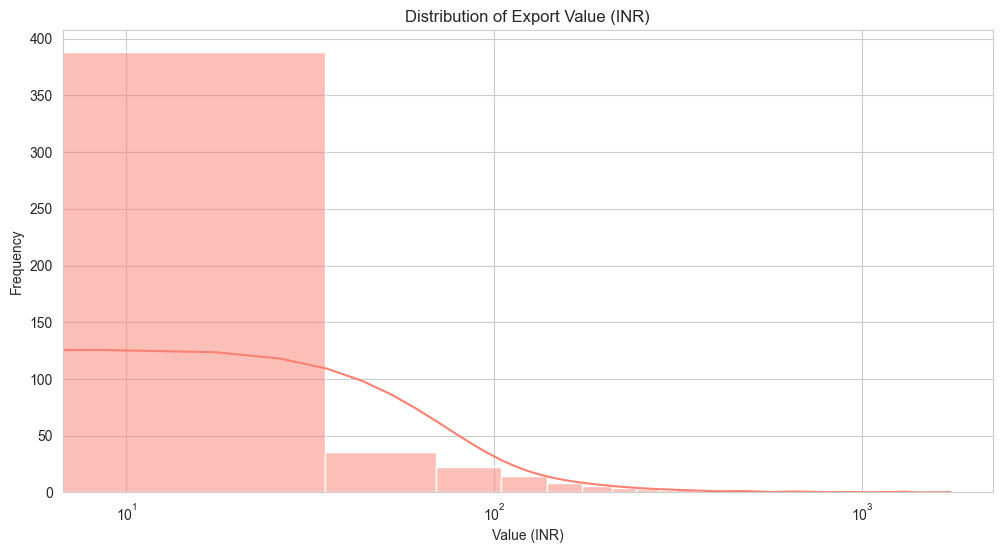

C:\Users\adity\AppData\Local\Temp\ipykernel_10236\2908364867.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned['year'], palette='viridis', order = df_cleaned['year'].value_counts().index)


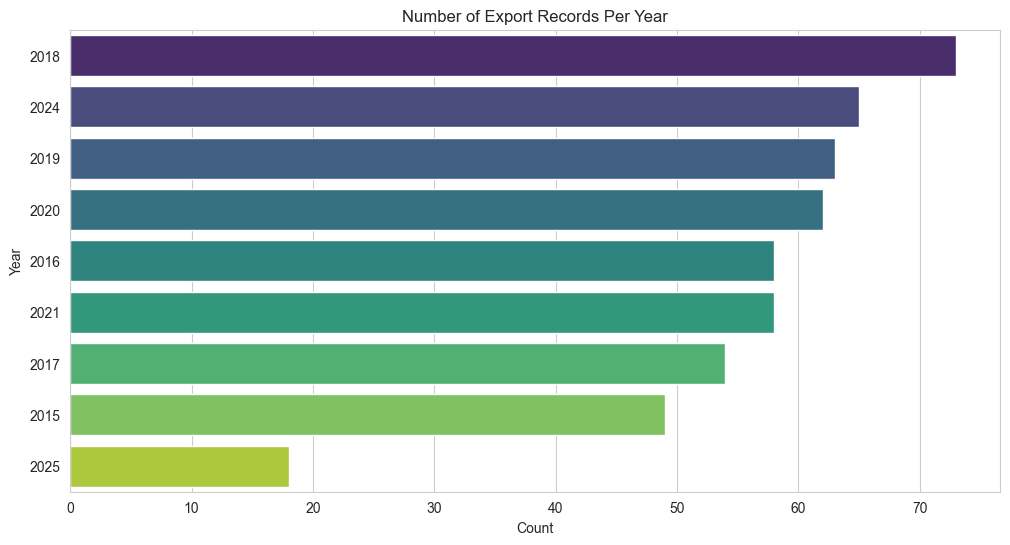

In [11]:
print("\n--- Performing Univariate Analysis ---")

# Set plot style
sns.set_style('whitegrid')

# Distribution of Quantity
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['quantity'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Export Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
# Using a log scale due to high skewness
plt.xscale('log')
plt.show()

# Distribution of Value (INR)
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['value_inr'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Export Value (INR)')
plt.xlabel('Value (INR)')
plt.ylabel('Frequency')
# Using a log scale due to high skewness
plt.xscale('log')
plt.show()

# Count of Exports per Year
plt.figure(figsize=(12, 6))
sns.countplot(y=df_cleaned['year'], palette='viridis', order = df_cleaned['year'].value_counts().index)
plt.title('Number of Export Records Per Year')
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()


--- Performing Bivariate Analysis ---


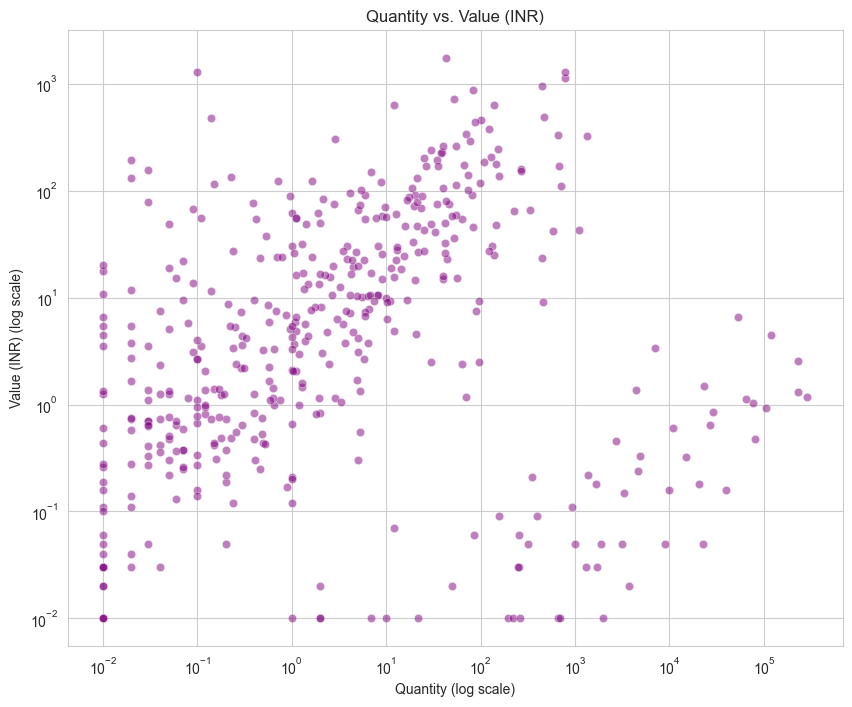

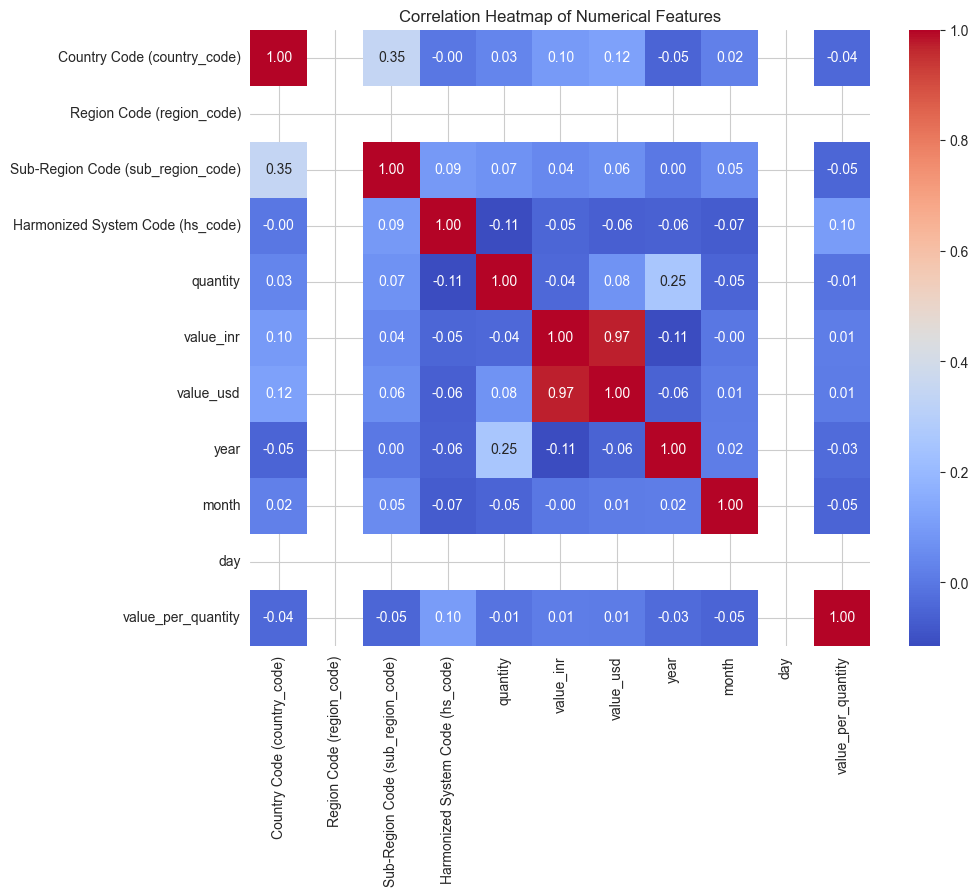

In [12]:
print("\n--- Performing Bivariate Analysis ---")

# Scatter plot of Quantity vs. Value (INR)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_cleaned, x='quantity', y='value_inr', alpha=0.5, color='purple')
plt.title('Quantity vs. Value (INR)')
plt.xlabel('Quantity (log scale)')
plt.ylabel('Value (INR) (log scale)')
plt.xscale('log')
plt.yscale('log')
plt.show()


# Correlation Heatmap for numerical features
plt.figure(figsize=(10, 8))
# Selecting only numeric columns for correlation
numeric_cols = df_cleaned.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


--- Performing Multivariate Analysis ---


C:\Users\adity\AppData\Local\Temp\ipykernel_10236\3643448012.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


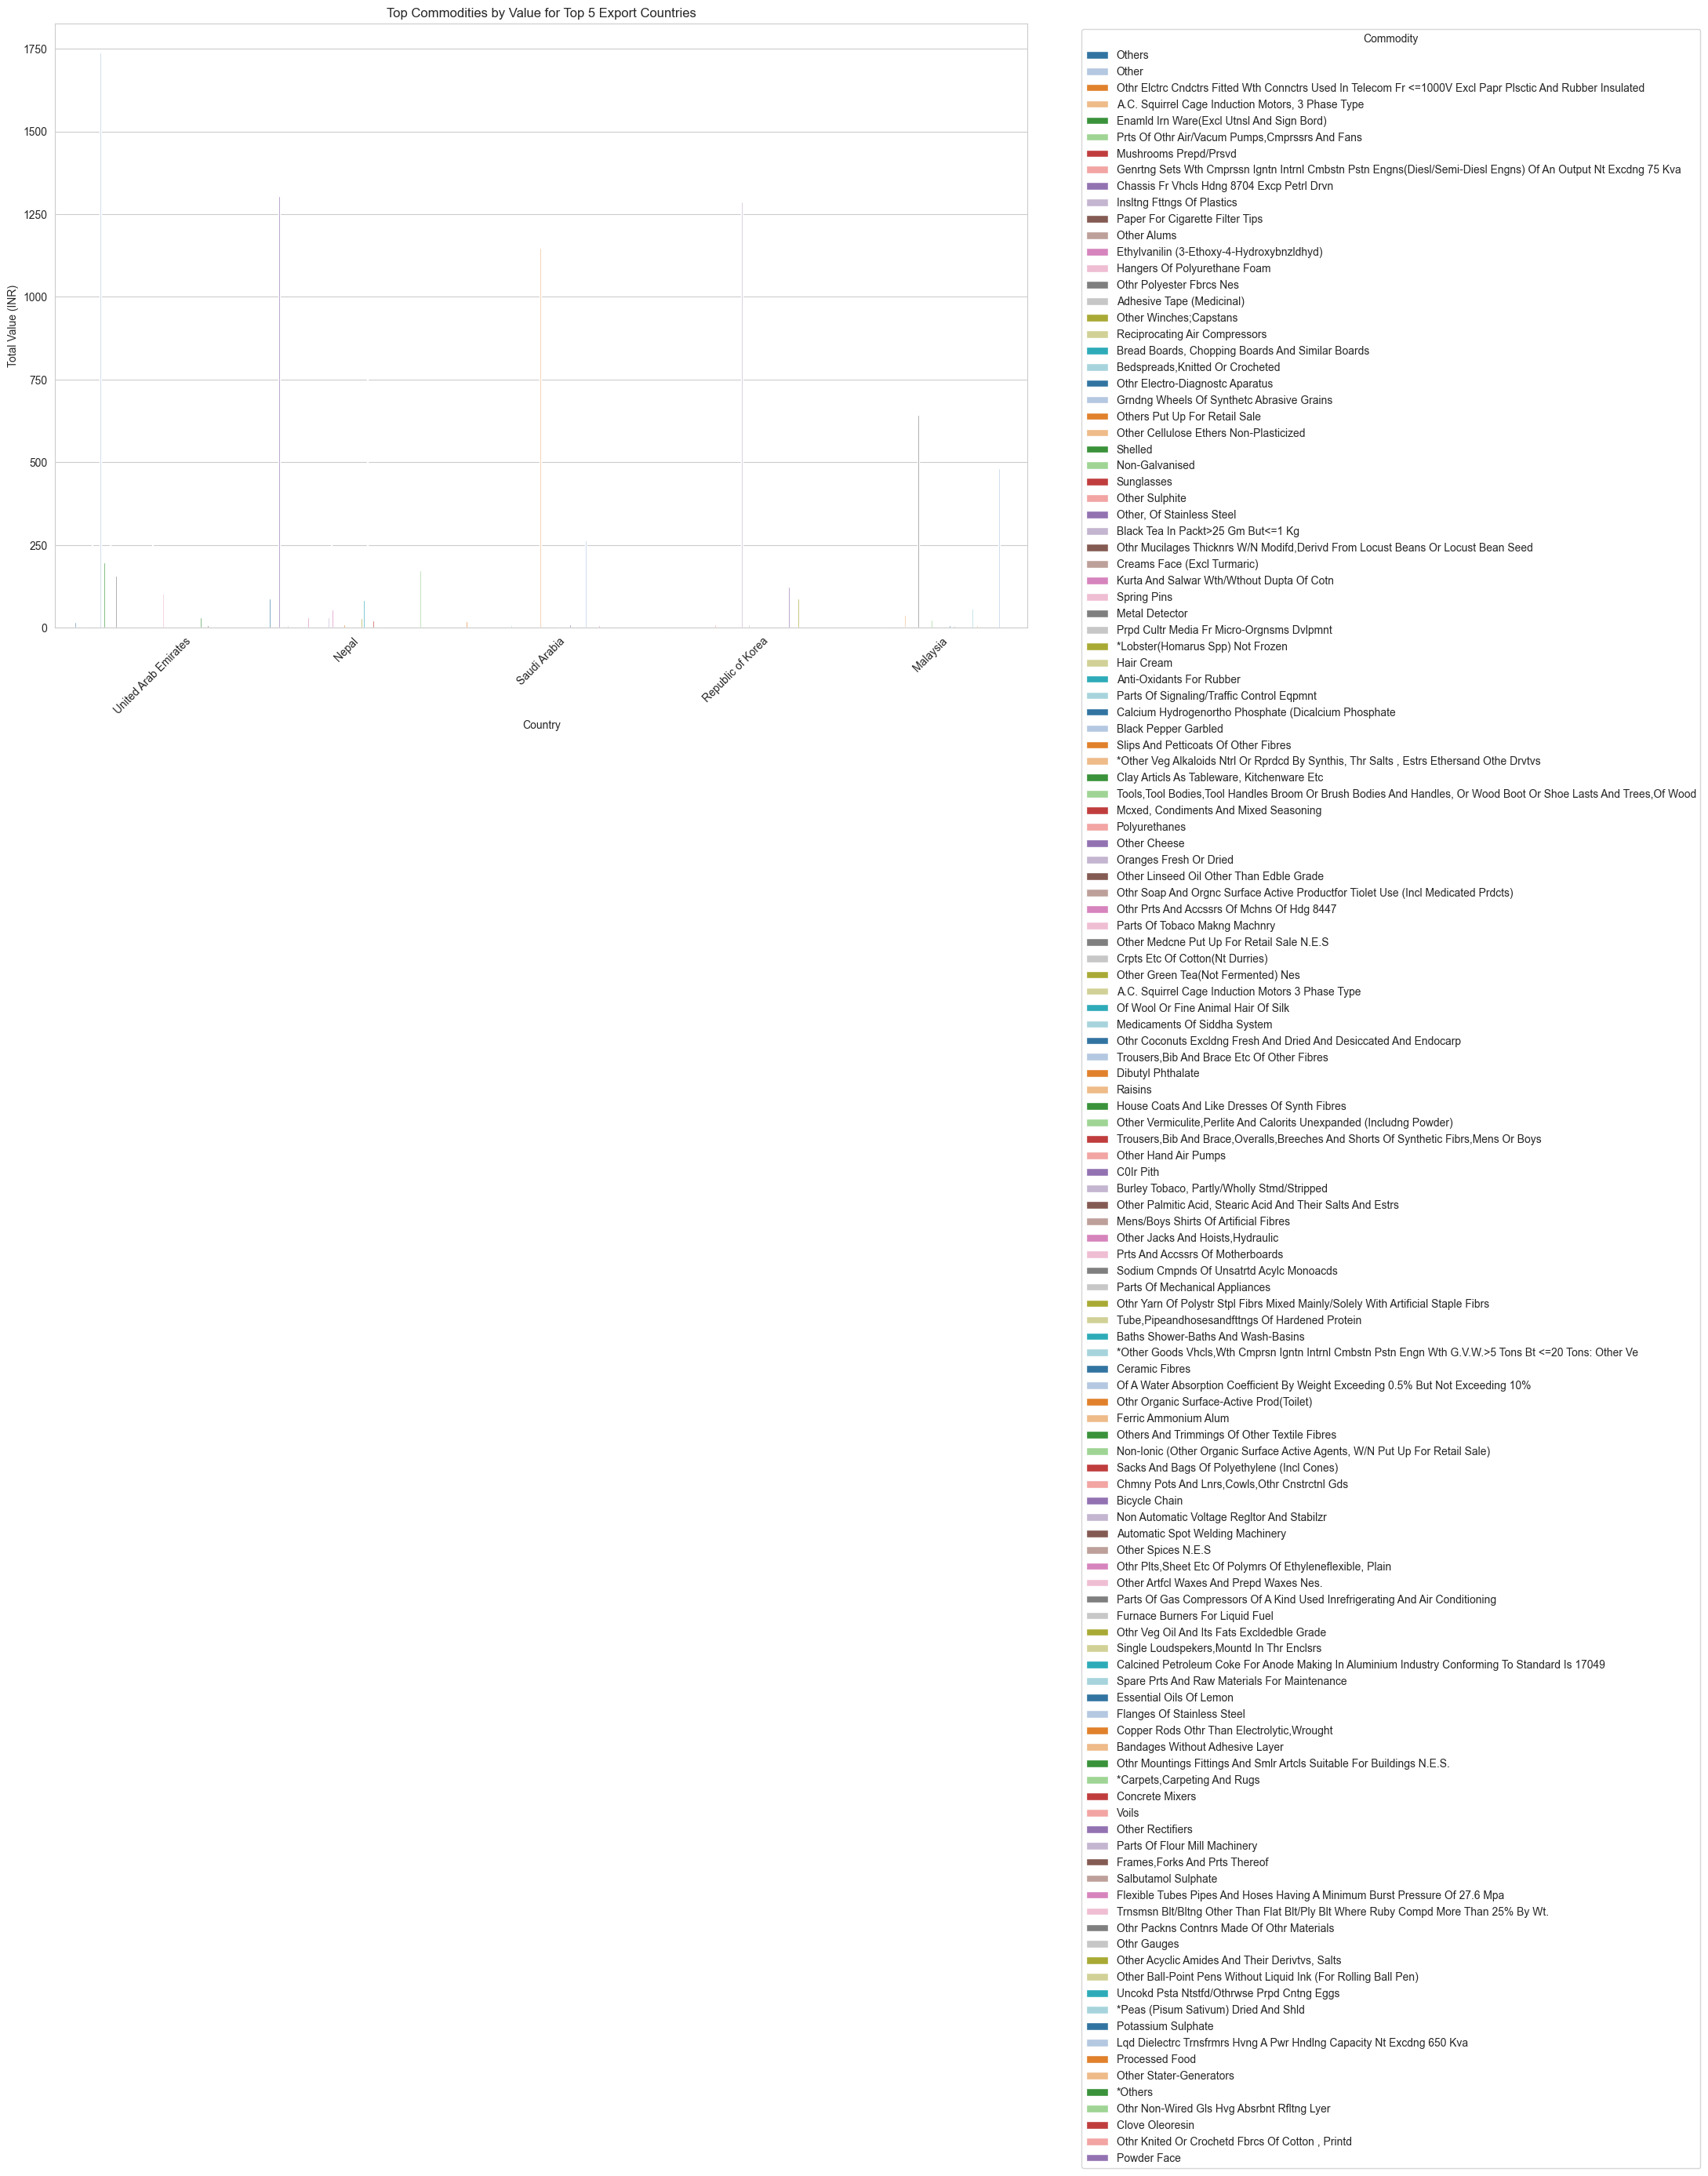

In [13]:
print("\n--- Performing Multivariate Analysis ---")

# Get top 5 countries by export value
top_5_countries = df_cleaned.groupby('country_name')['value_inr'].sum().nlargest(5).index

# Filter the dataframe for only the top 5 countries
top_countries_df = df_cleaned[df_cleaned['country_name'].isin(top_5_countries)]

# Plot top commodities for each of the top 5 countries
plt.figure(figsize=(16, 10))
sns.barplot(data=top_countries_df, x='country_name', y='value_inr', hue='commodity',
            order=top_5_countries, palette='tab20', estimator=sum, errorbar=None)
plt.title('Top Commodities by Value for Top 5 Export Countries')
plt.xlabel('Country')
plt.ylabel('Total Value (INR)')
plt.xticks(rotation=45)
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


--- Performing Time Series Analysis ---


C:\Users\adity\AppData\Local\Temp\ipykernel_10236\184378351.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df_cleaned.set_index('date')['value_inr'].resample('M').sum()


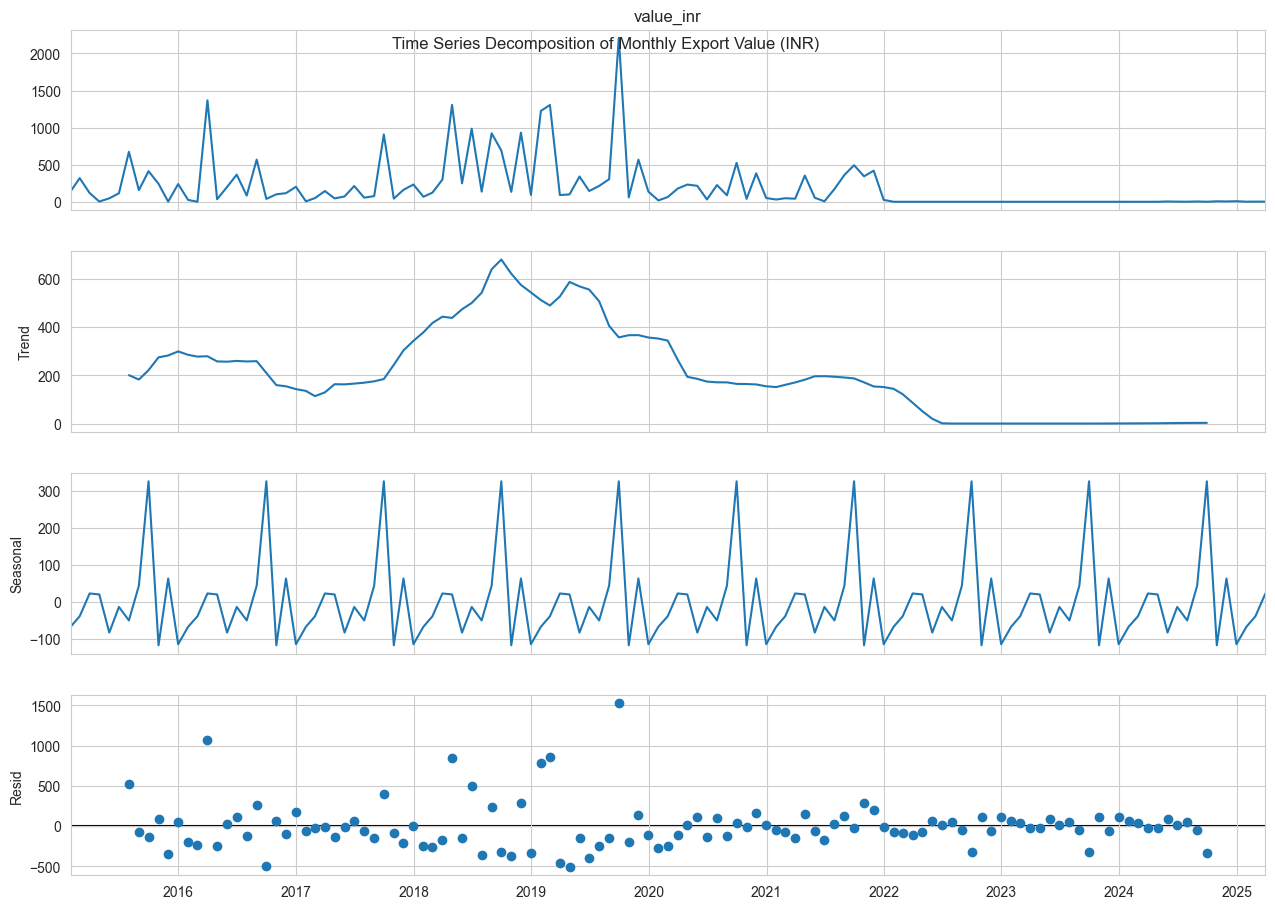

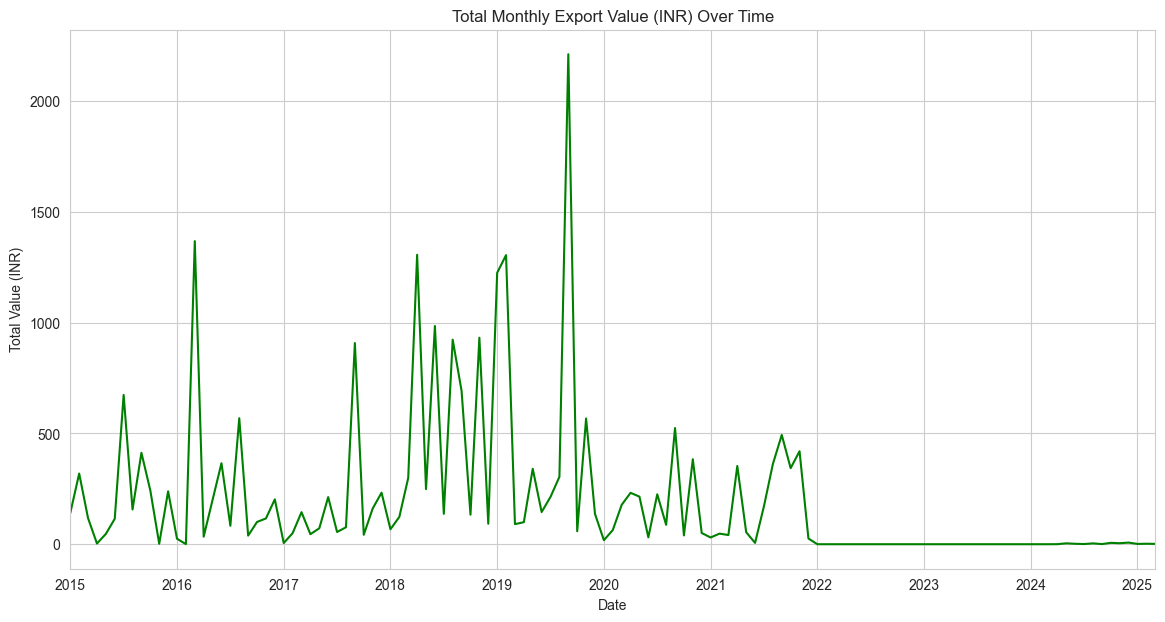

In [17]:
# Install the necessary library
import sys
import subprocess
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'statsmodels'])

from statsmodels.tsa.seasonal import seasonal_decompose

print("\n--- Performing Time Series Analysis ---")


# Resample data to monthly frequency for time series analysis
monthly_data = df_cleaned.set_index('date')['value_inr'].resample('M').sum()

# Decompose the time series
decomposition = seasonal_decompose(monthly_data, model='additive', period=12)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Time Series Decomposition of Monthly Export Value (INR)', y=0.92)
plt.savefig('time_series_decomposition.png')


# Plot monthly export value
plt.figure(figsize=(14, 7))
monthly_data.plot(title='Total Monthly Export Value (INR) Over Time', grid=True, color='green')
plt.xlabel('Date')
plt.ylabel('Total Value (INR)')
plt.savefig('monthly_export_value.png')

In [5]:
# Import necessary libraries
import pandas as pd
from scipy.stats import ttest_ind

# --------------------------------------------------------------------------
# Step 1: Load and Clean the Data (to create the 'df_cleaned' DataFrame)
# --------------------------------------------------------------------------

# Load your dataset into a pandas DataFrame
df = pd.read_csv('Exports to Asian Countries_Sample_Data.csv')
print("--- Data loaded successfully. ---")

# --- Capturing 'Before Cleaning' Snapshot ---
df_cleaned = df.copy()
print(f"Created a new DataFrame 'df_cleaned' with {len(df_cleaned)} rows to begin cleaning.")

# Step 1.1: Convert Date Column
df_cleaned['date'] = pd.to_datetime(df_cleaned['Date (date)'])

# Step 1.2: Handle Missing Values
df_cleaned['Value of commodity quantity in US Dollars (value_dl)'].fillna(0, inplace=True)

# Step 1.3: Rename Columns
df_cleaned.rename(columns={
    'Country Name (country_name)': 'country_name',
    'Commodity Name (commodity)': 'commodity',
    'Quantity of commodity (value_qt)': 'quantity',
    'Value of commodity quantity in INR (value_rs)': 'value_inr',
    'Value of commodity quantity in US Dollars (value_dl)': 'value_usd',
    'Unit of Quantity (unit)': 'unit'
}, inplace=True)

# Step 1.4: Type Casting
df_cleaned['quantity'] = df_cleaned['quantity'].astype(float)
df_cleaned['value_inr'] = df_cleaned['value_inr'].astype(float)
df_cleaned['value_usd'] = df_cleaned['value_usd'].astype(float)

print("--- Cleaning Process Complete. The `df_cleaned` DataFrame is now ready. ---")


# --------------------------------------------------------------------------
# Step 2: Perform the Hypothesis Test (The part that caused the error)
# --------------------------------------------------------------------------

print("\n--- Performing Hypothesis Testing ---")

# Identify the top two countries by total export value
top_2_countries = df_cleaned.groupby('country_name')['value_inr'].sum().nlargest(2).index
country_1_name = top_2_countries[0]
country_2_name = top_2_countries[1]

print(f"Comparing mean export values between: '{country_1_name}' and '{country_2_name}'")

# Create data samples for the two countries
country_1_values = df_cleaned[df_cleaned['country_name'] == country_1_name]['value_inr']
country_2_values = df_cleaned[df_cleaned['country_name'] == country_2_name]['value_inr']

# Perform the t-test
t_stat, p_value = ttest_ind(country_1_values, country_2_values, equal_var=False) # Welch's t-test

print(f"\nResults of T-test:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: Since the p-value ({p_value:.4f}) is less than {alpha}, we reject the null hypothesis.")
    print("✅ There is a statistically significant difference in the mean export values between the two countries.")
else:
    print(f"\nConclusion: Since the p-value ({p_value:.4f}) is greater than {alpha}, we fail to reject the null hypothesis.")
    print("❌ There is no statistically significant difference in the mean export values between the two countries.")

--- Data loaded successfully. ---
Created a new DataFrame 'df_cleaned' with 500 rows to begin cleaning.
--- Cleaning Process Complete. The `df_cleaned` DataFrame is now ready. ---

--- Performing Hypothesis Testing ---
Comparing mean export values between: 'United Arab Emirates' and 'Nepal'

Results of T-test:
T-statistic: 0.4530
P-value: 0.6520

Conclusion: Since the p-value (0.6520) is greater than 0.05, we fail to reject the null hypothesis.
❌ There is no statistically significant difference in the mean export values between the two countries.


C:\Users\adity\AppData\Local\Temp\ipykernel_4024\1720237058.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Value of commodity quantity in US Dollars (value_dl)'].fillna(0, inplace=True)


In [4]:
# --- Save the Cleaned DataFrame to a new CSV file ---
output_filename = 'Exports_to_Asian_Countries_Cleaned.csv'
df_cleaned.to_csv(output_filename, index=False)

print(f"\n✅ Cleaned data successfully saved to '{output_filename}'")


✅ Cleaned data successfully saved to 'Exports_to_Asian_Countries_Cleaned.csv'


Loading and preparing data...
✅ Data preparation complete. Generating new visualizations...
Saved: geographical_export_map.png


C:\Users\adity\AppData\Local\Temp\ipykernel_27900\1168686026.py:68: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\adity\AppData\Local\Temp\ipykernel_27900\1168686026.py:74: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Saved: top_bottom_countries_by_volume.png
Saved: commodity_efficiency_analysis.png


C:\Users\adity\AppData\Local\Temp\ipykernel_27900\1168686026.py:87: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Saved: country_performance_bubble_chart.png

🎉 Success! All new visualizations have been saved as image files.


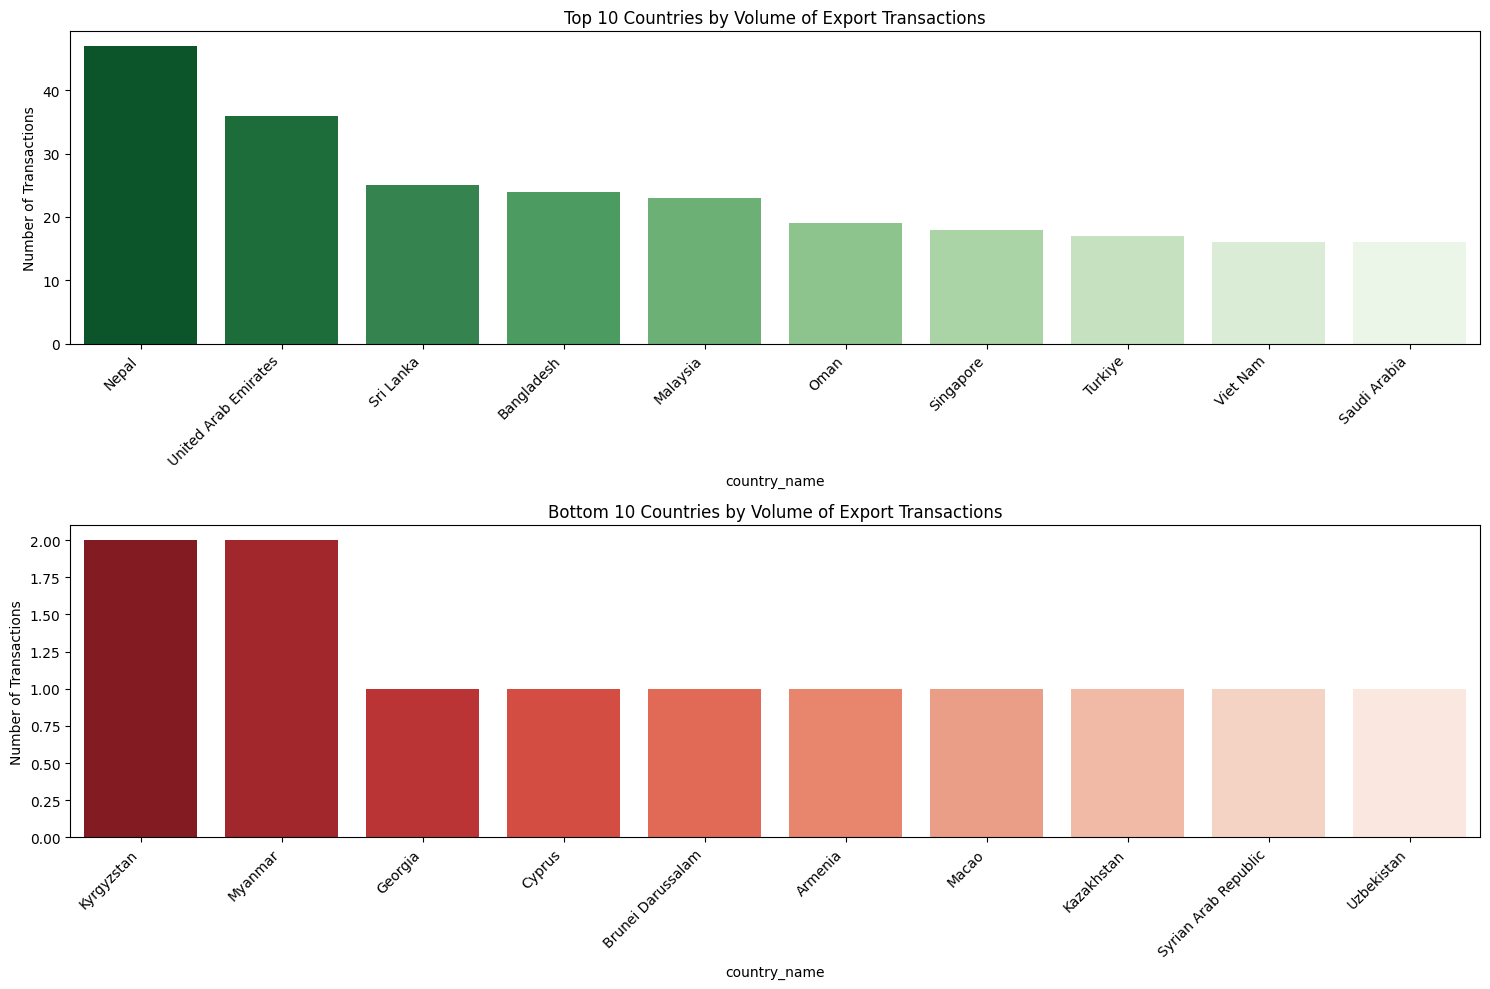

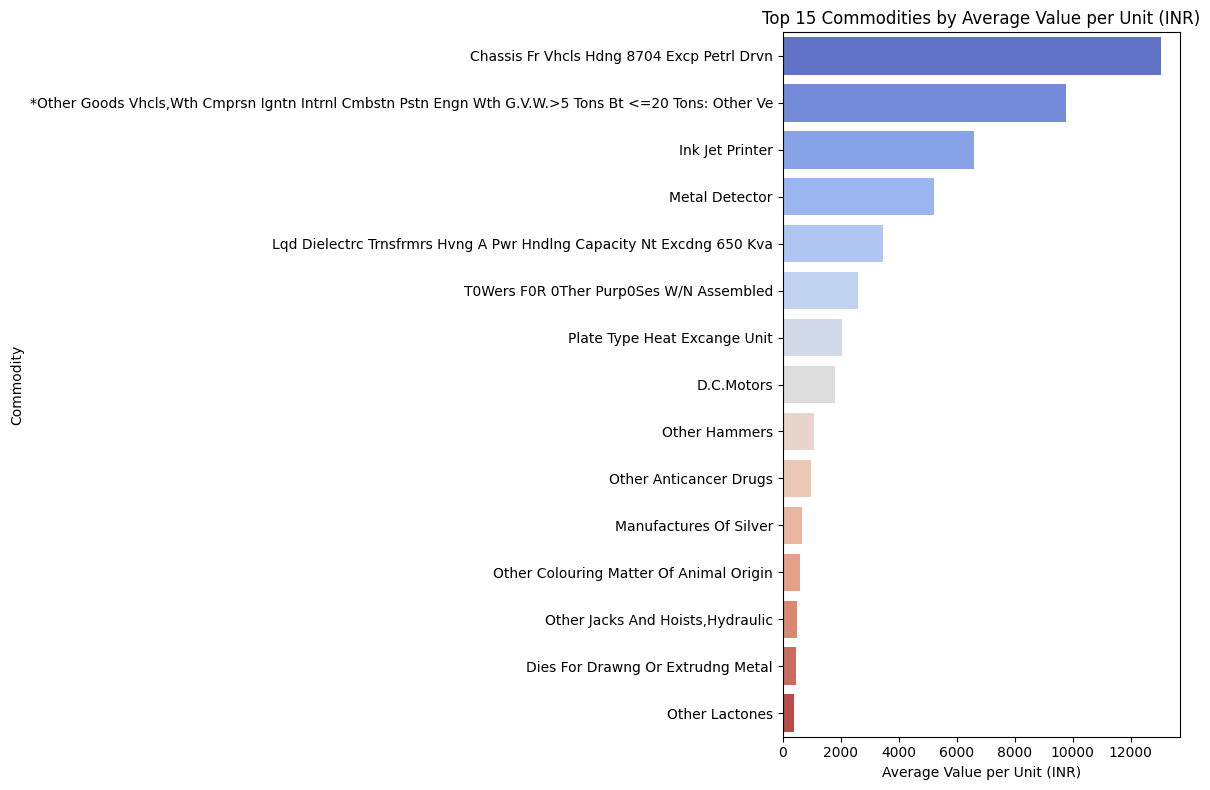

In [1]:
# ==============================================================================
# PART 1: SETUP AND DATA PREPARATION
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
print("Loading and preparing data...")
df = pd.read_csv('Exports to Asian Countries_Sample_Data.csv')

# --- Start Cleaning ---
df_cleaned = df.copy()
df_cleaned.rename(columns={
    'Country Name (country_name)': 'country_name',
    'Commodity Name (commodity)': 'commodity',
    'Quantity of commodity (value_qt)': 'quantity',
    'Value of commodity quantity in INR (value_rs)': 'value_inr',
    'Value of commodity quantity in US Dollars (value_dl)': 'value_usd',
    'Unit of Quantity (unit)': 'unit',
    'ISO Alpha 3 Code (alpha_3_code)': 'iso_alpha'
}, inplace=True)

for col in ['quantity', 'value_inr', 'value_usd']:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

df_cleaned.dropna(subset=['quantity', 'value_inr', 'value_usd', 'iso_alpha'], inplace=True)
df_cleaned = df_cleaned[df_cleaned['quantity'] > 0]

# Feature Engineering for new metrics
df_cleaned['value_per_quantity'] = df_cleaned['value_inr'] / df_cleaned['quantity']
df_cleaned['transaction_count'] = 1

print("✅ Data preparation complete. Generating new visualizations...")


# ==============================================================================
# PART 2: GENERATE AND SAVE ADVANCED VISUALIZATIONS
# ==============================================================================

# --- Plot 1: Geographical Distribution of Export Value (Choropleth Map) ---
country_summary = df_cleaned.groupby(['country_name', 'iso_alpha'])['value_inr'].sum().reset_index()

fig1 = px.choropleth(
    country_summary,
    locations="iso_alpha",
    color="value_inr",
    hover_name="country_name",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Geographical Distribution of Total Export Value (INR)"
)
fig1.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)
fig1.write_image("geographical_export_map.png", width=1200, height=700)
print("Saved: geographical_export_map.png")

# --- Plot 2: Top & Bottom Performing Countries by Transaction Volume ---
country_transactions = df_cleaned.groupby('country_name')['transaction_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.barplot(x=country_transactions.head(10).index, y=country_transactions.head(10).values, palette='Greens_r')
plt.title('Top 10 Countries by Volume of Export Transactions')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 1, 2)
sns.barplot(x=country_transactions.tail(10).index, y=country_transactions.tail(10).values, palette='Reds_r')
plt.title('Bottom 10 Countries by Volume of Export Transactions')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('top_bottom_countries_by_volume.png')
print("Saved: top_bottom_countries_by_volume.png")

# --- Plot 3: Commodity Efficiency Analysis (Value per Unit) ---
commodity_efficiency = df_cleaned.groupby('commodity')['value_per_quantity'].mean().nlargest(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=commodity_efficiency.index, x=commodity_efficiency.values, palette='coolwarm')
plt.title('Top 15 Commodities by Average Value per Unit (INR)')
plt.xlabel('Average Value per Unit (INR)')
plt.ylabel('Commodity')
plt.tight_layout()
plt.savefig('commodity_efficiency_analysis.png')
print("Saved: commodity_efficiency_analysis.png")


# --- Plot 4: Multivariate Analysis with Bubble Chart ---
country_multi_dim = df_cleaned.groupby(['country_name', 'iso_alpha']).agg(
    total_value_inr=('value_inr', 'sum'),
    transaction_count=('transaction_count', 'sum'),
    avg_value_per_transaction=('value_inr', 'mean')
).reset_index()

fig4 = px.scatter(
    country_multi_dim,
    x="transaction_count",
    y="avg_value_per_transaction",
    size="total_value_inr",
    color="country_name",
    hover_name="country_name",
    size_max=60,
    log_x=True,
    log_y=True,
    title="Country Performance: Transaction Volume vs. Average Value per Transaction"
)
fig4.update_layout(
    xaxis_title="Total Number of Transactions (Log Scale)",
    yaxis_title="Average Value per Transaction (INR, Log Scale)",
    showlegend=False
)
fig4.write_image("country_performance_bubble_chart.png", width=1200, height=800)
print("Saved: country_performance_bubble_chart.png")

print("\n🎉 Success! All new visualizations have been saved as image files.")